MACHINE LEARNING PROJECT : CARDIOVASCULAR DISEASE PREDICTION

IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import sklearn
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, jaccard_score
import ydata_profiling as pp

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

c:\Users\MADHU LEKHA\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DOWNLOADING DATASETS

READING THE DATASET

In [2]:
data = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [4]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

DISPLAYING THE FIRST THREE ROWS OF DATASET

In [5]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


COLUMN INFORMATION OF A DATASET

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


MODEL PREPARATION

DATASET : 30% ; TRAINING SET : 70%

In [7]:
X = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']].values
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TUNING MODELS AND TESTS OF ALL FEATURES

LOGISTIC REGRESSION

Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variable by estimating probablities using logistic function.

In [10]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\MADHU LEKHA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
pred_test_log = logmodel.predict(X_test)
pred_log = logmodel.predict(X_train)

In [11]:
print(classification_report(y_test,pred_test_log))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6877
           1       0.74      0.67      0.71      6918

    accuracy                           0.72     13795
   macro avg       0.72      0.72      0.72     13795
weighted avg       0.72      0.72      0.72     13795



ACCURACY RATE OF LOGISTIC REGRESSION

In [12]:
acc_log = metrics.accuracy_score(y_train,pred_log ) * 100
acc_test_log = metrics.accuracy_score(y_test, pred_test_log) * 100
print("Accuracy train : ", acc_log)
print("Accuracy test : ", acc_test_log)

Accuracy train :  71.67633200434939
Accuracy test :  71.98985139543312


SUPPORT VECTOR MACHINE

The SVM training algorithm builds builds a model that assigns new test samples to one category or other , amking it a non probablistic binary linear classification.

In [13]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [14]:
pred_svc = clf.predict(X_train)
pred_test_svc = clf.predict(X_test)
pred_test_svc [0:5]

array([1, 1, 0, 0, 0], dtype=int64)

CREATING A NEW CONFUSION MATRIX

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

COMPUTATION OF CONFUSION MATRIX

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      6877
           1       0.62      0.58      0.60      6918

    accuracy                           0.61     13795
   macro avg       0.61      0.61      0.61     13795
weighted avg       0.61      0.61      0.61     13795

Confusion matrix, without normalization
[[4394 2483]
 [2935 3983]]


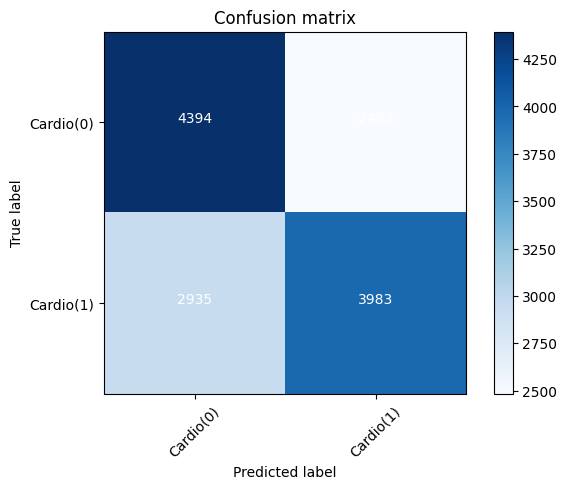

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test_svc, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, pred_test_svc))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False,  title='Confusion matrix')


ACCURACY RATE OF SVC

In [17]:
acc_svc = accuracy_score(y_train,pred_svc) * 100
acc_test_svc = accuracy_score(y_test, pred_test_svc) * 100
print("Accuracy train : ", acc_svc)
print("Accuracy test : ", acc_test_svc)

Accuracy train :  61.495106922798115
Accuracy test :  60.724900326205145


k-NEAREST NEIGHBORS ALGORITHM

k-nearest neighbors algorithm is used for classification and regression

TRAINING THE MODEL

In [18]:
k = 45
#Training and Predicting  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
pred_knn = neigh.predict(X_train)
pred_test_knn = neigh.predict(X_test)
pred_test_knn[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [19]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred_test_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pred_test_knn)

    
    std_acc[n-1]=np.std(pred_test_knn==y_test)/np.sqrt(pred_test_knn.shape[0])

mean_acc

array([0.63, 0.63, 0.67, 0.67, 0.68, 0.69, 0.69, 0.69, 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71])

PLOT REPRESENTATION OF METRICS

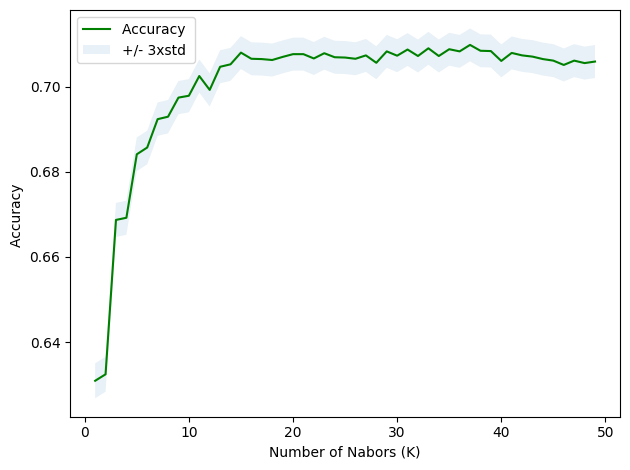

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

ACCURACY RATE OF k-NEAREST NEIGHBOR

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7098948894527003 with k= 37


In [22]:
acc_knn = accuracy_score(y_train, pred_knn) * 100
acc_test_knn = accuracy_score(y_test, pred_test_knn) * 100
print("Accuracy train : ", acc_knn)
print("Accuracy test : ", acc_test_knn)

Accuracy train :  72.13301920985865
Accuracy test :  70.59804276911925


DECISION TREE CLASSIFIER

Acts as a predictive model which maps features to conclusions about the target value.

In [23]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

ACCURACY RATE OF DECISION TREE CLASSIFIER

In [24]:
pred_decision_tree = DecTree.predict(X_train)
pred_test_decision_tree = DecTree.predict(X_test)

acc_decision_tree = metrics.accuracy_score(y_train, pred_decision_tree) * 100
acc_test_decision_tree = metrics.accuracy_score(y_test, pred_test_decision_tree) * 100

print("Accuracy train : ", acc_decision_tree)
print("Accuracy test : ", acc_test_decision_tree)

Accuracy train :  72.6766944545125
Accuracy test :  73.1279449075752


METRIC CLASSIFICATION REPORT

In [25]:
print(classification_report(y_test, pred_test_decision_tree))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      6877
           1       0.74      0.72      0.73      6918

    accuracy                           0.73     13795
   macro avg       0.73      0.73      0.73     13795
weighted avg       0.73      0.73      0.73     13795



RANDOM FOREST

This feature output the mode of classes and the mean prediction of individual trees

In [26]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

ACCURACY RATE OF RANDOM FOREST

In [27]:
#predictions
pred_random_forest = rfc.predict(X_train)
pred_test_random_forest = rfc.predict(X_test)

#Evaluation
acc_random_forest = metrics.accuracy_score(y_train, pred_random_forest) * 100
acc_test_random_forest = metrics.accuracy_score(y_test, pred_test_random_forest) * 100

print("Accuracy train : ", acc_random_forest)
print("Accuracy test : ", acc_test_random_forest)

Accuracy train :  99.98187749184487
Accuracy test :  71.68539325842697


MODEL EVALUATION

CREATING A DATAFRAME OF RESLUTS OBTAINED

In [28]:
models = pd.DataFrame({
       'Model': ['Logistic Regression', 'Support Vector Machines', 'k-Nearest Neighbors', 
                 'Decision Tree Classifier', 'Random Forest', ],
    
    'Score_train': [acc_log, acc_svc, acc_knn, acc_decision_tree, acc_random_forest, ],
    
    'Score_test': [acc_test_log, acc_test_svc, acc_test_knn, 
              acc_test_decision_tree, acc_test_random_forest, ]
                    })

DISPLAY OF DATA IN ASCENDING ORDER

In [29]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Random Forest,99.981877,71.685393
3,Decision Tree Classifier,72.676694,73.127945
2,k-Nearest Neighbors,72.133019,70.598043
0,Logistic Regression,71.676332,71.989851
1,Support Vector Machines,61.495107,60.724900


DISPLAY OF DATA IN DECSCENDING ORDER

In [30]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
3,Decision Tree Classifier,72.676694,73.127945
0,Logistic Regression,71.676332,71.989851
4,Random Forest,99.981877,71.685393
2,k-Nearest Neighbors,72.133019,70.598043
1,Support Vector Machines,61.495107,60.724900


In [31]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
0,Logistic Regression,71.676332,71.989851,0.313519
3,Decision Tree Classifier,72.676694,73.127945,0.451250
1,Support Vector Machines,61.495107,60.724900,0.770207
2,k-Nearest Neighbors,72.133019,70.598043,1.534976
4,Random Forest,99.981877,71.685393,28.296484


GRAPHICAL PLOT OF MODELS AND THEIR SCORES

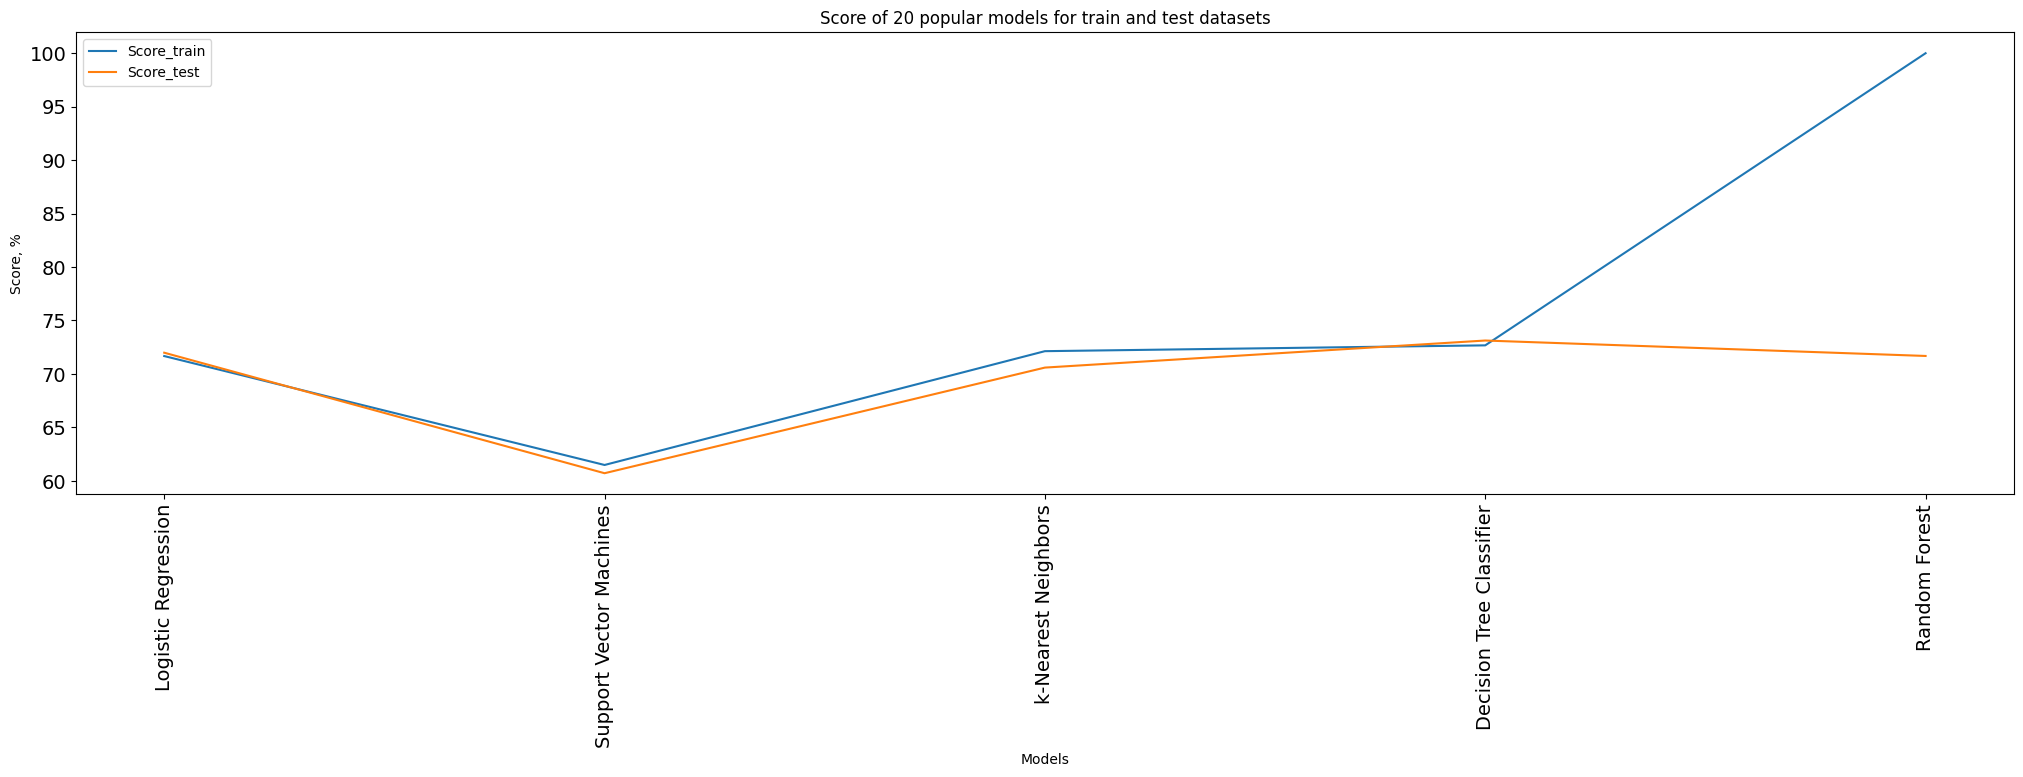

In [32]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 20 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()